In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(8)
n_assets = 50
sample = np.random.randint(0, 500, n_assets)

In [3]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_list = np.array(sp500[0]['Symbol'])[sample]

In [4]:
start_date = '2015-01-01'
end_date = '2024-05-20'

In [5]:
prices_df = yf.download(list(sp500_list), start=start_date, end=end_date)['Adj Close']
prices_df.dropna(axis=1, inplace=True) 

[*********************100%%**********************]  47 of 47 completed


In [6]:
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df.head()

Downloaded 2360 rows of data.


Ticker,A,ALL,ATO,AZO,BDX,CDNS,CI,CME,COF,COST,...,SBAC,SCHW,TDY,TMUS,TRGP,TRMB,TRV,UDR,WMB,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,37.551201,57.149796,44.366871,616.789978,119.417488,18.830000,97.028183,61.346497,68.960213,115.047562,...,105.557999,26.970398,102.160004,27.073481,64.964722,26.910000,85.263603,22.636898,25.889225,27.094406
2015-01-05,36.847576,56.016911,43.565258,608.489990,120.151794,18.400000,95.358017,61.694508,67.371864,113.739616,...,103.893341,26.069000,99.720001,26.706553,60.189140,26.030001,84.236595,22.875027,24.864410,26.786871
2015-01-06,36.273548,55.976158,43.295399,607.820007,119.921280,17.910000,95.735443,60.754887,66.117882,115.242546,...,103.351135,25.114061,98.019997,26.647051,58.320187,25.660000,83.484566,23.004915,24.526625,26.929394
2015-01-07,36.754990,56.897148,43.914474,607.239990,122.730377,18.420000,97.981163,61.457855,66.870262,117.249306,...,104.768478,25.604918,98.790001,28.015598,57.767979,25.340000,84.907784,23.163668,24.394947,27.161930
2015-01-08,37.856712,57.989281,44.208141,606.000000,124.967415,18.610001,102.972687,61.743233,67.522331,118.256676,...,105.814827,26.274265,100.440002,28.779211,59.400291,25.670000,86.670616,23.207315,24.629677,27.476974


In [7]:
ticker = np.random.choice(prices_df.columns)
data = prices_df[ticker].reset_index()
data.columns = ['Date', 'Close']

In [8]:
data = data[['Date', 'Close']]
data = data.dropna()

In [9]:
data['Prediction'] = data['Close'].shift(-1)
X = np.array(data.drop(['Prediction', 'Date'], axis=1))[:-1]
y = np.array(data['Prediction'])[:-1]

In [10]:
print(X.shape, y.shape)

(2359, 1) (2359,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(X_test)

In [14]:
model.fit(X, y)

LinearRegression()

In [15]:
future_days = 365
last_close = data['Close'].values[-1]
future_features = [last_close]

for _ in range(future_days - 1):
    next_close = model.predict(np.array(future_features[-1]).reshape(-1, 1))[0]
    future_features.append(next_close)

In [16]:
future_dates = pd.date_range(start='2024-01-01', periods=future_days)

In [17]:
predicted_data = pd.DataFrame(data={'Date': future_dates, 'Predicted Close': future_features})

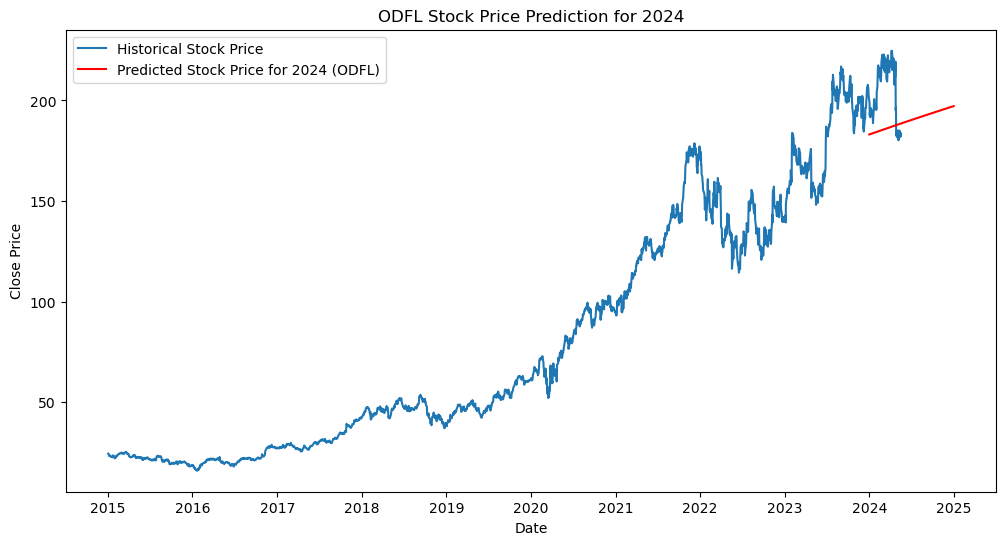

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Historical Stock Price')
plt.plot(predicted_data['Date'], predicted_data['Predicted Close'], label=f'Predicted Stock Price for 2024 ({ticker})', color='red')
plt.legend()
plt.title(f'{ticker} Stock Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()